In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

C:\Users\Harsh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape') 
# to avoid unicode errors, use encoding ='unicode_escape'
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#delete unnecessary columns like which contains no values
df.drop(['Status','unnamed1'], axis=1, inplace= True)

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
#rename column 
df.rename(columns={'Cust_name' : 'Customer_name'}) #It won't save because we have not written inplace='True'.

,User_ID,Customer_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratort Data Analysis

# Gender

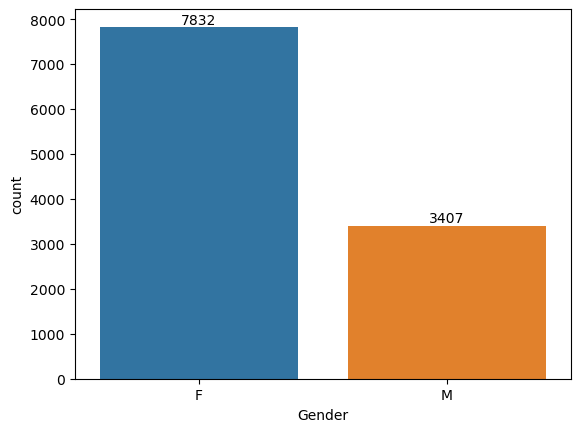

In [20]:
ax = sns.countplot(x='Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

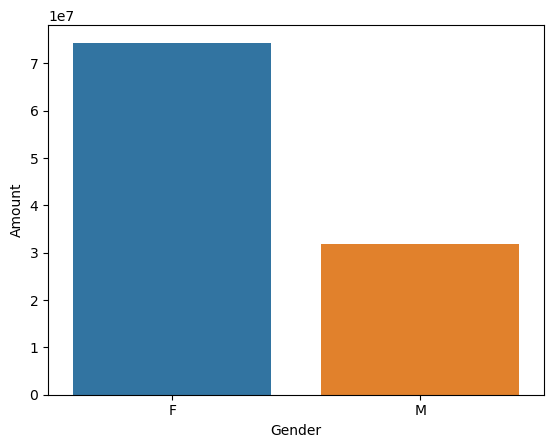

In [23]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum()
sns.barplot(x='Gender', y='Amount', data = sales_gen)

From above graphs we can state that most buyers are females and they have higher purchasing power than men.

# Age

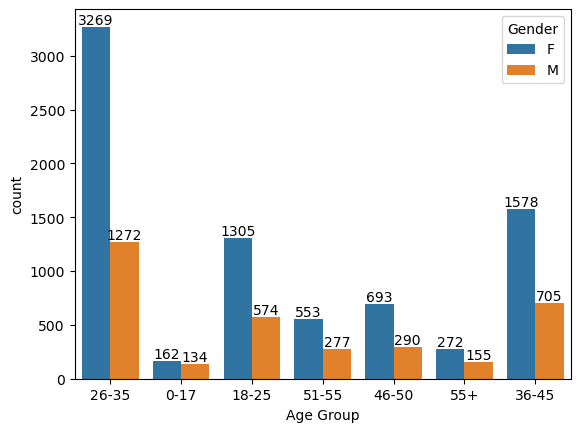

In [26]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

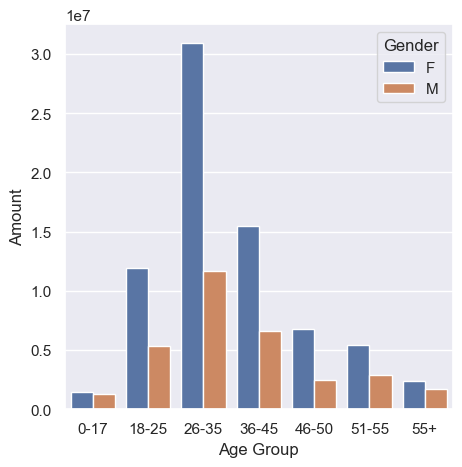

In [56]:
sales_Age = df.groupby(['Age Group','Gender'], as_index=False)['Amount'].sum()
sns.barplot(x='Age Group', y='Amount', hue='Gender', data = sales_Age)

From above Graph we can see that most of the Buyers are of age group between 26-35 years old and that too females.

# State

<AxesSubplot:xlabel='State', ylabel='Orders'>

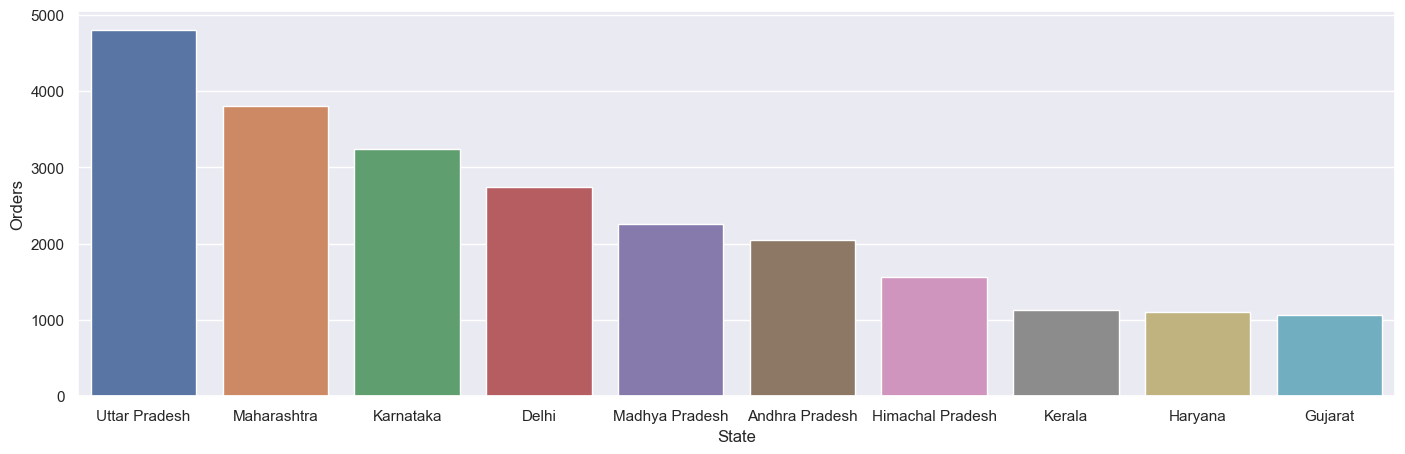

In [46]:
State_ord = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Orders', data=State_ord)

<AxesSubplot:xlabel='State', ylabel='Amount'>

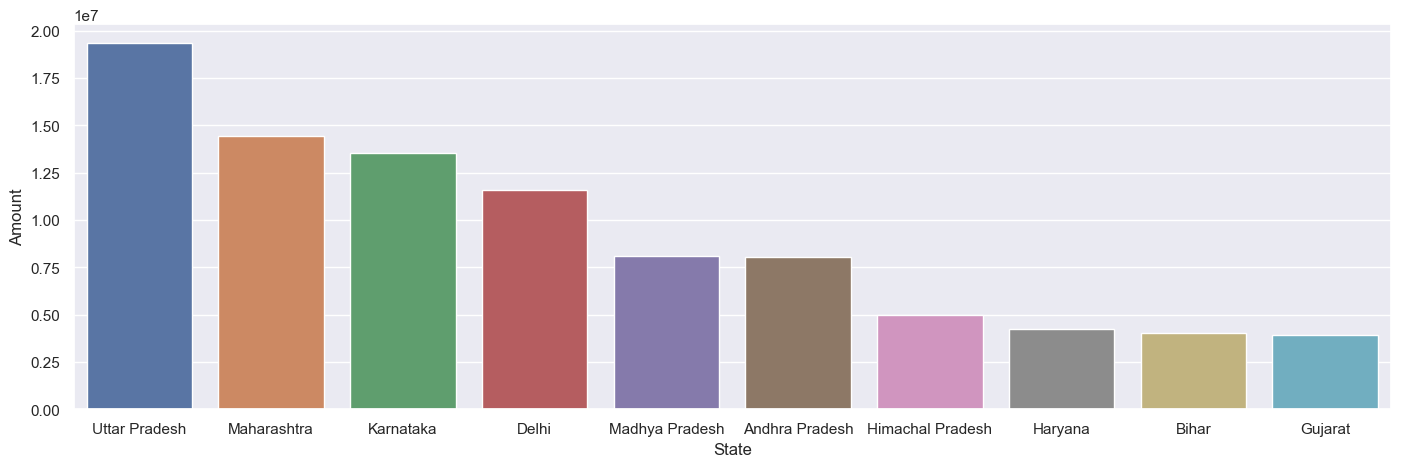

In [47]:
State_amt = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Amount', data=State_amt)


From Above graphs we can demonstrate that most of the orders and total sales/ amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

# Marital Status

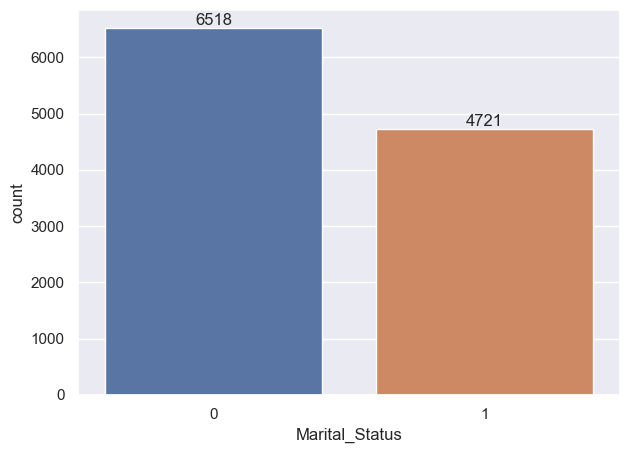

In [51]:
ax = sns.countplot(data = df, x='Marital_Status')
sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

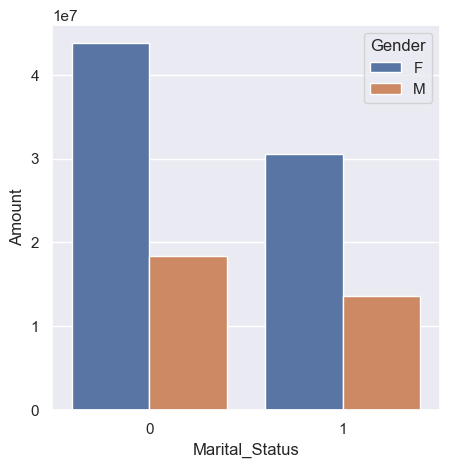

In [55]:
Sales_state = df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum()
sns.set(rc={'figure.figsize': (5,5)})
sns.barplot(data = Sales_state, x='Marital_Status', y = 'Amount', hue = 'Gender')

 From above graph we can see that married females have higher purchasing power as compare to men.

# Occupation

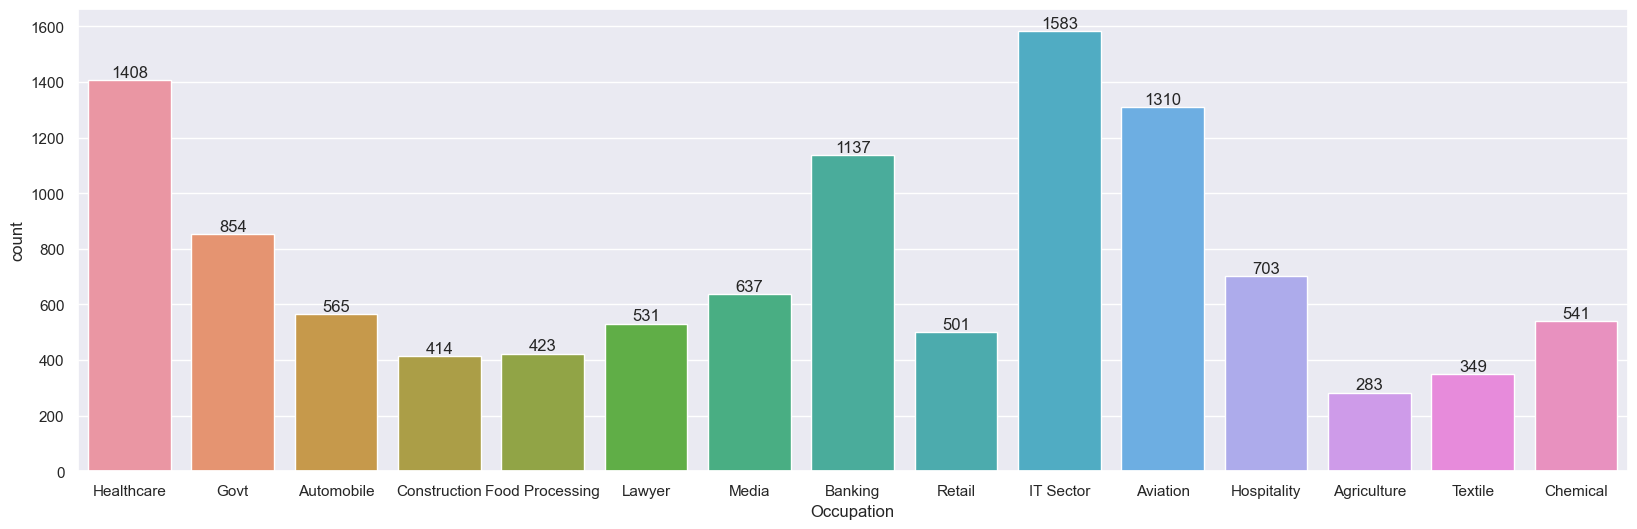

In [60]:
sns.set(rc= {'figure.figsize':(20,6)})
ax = sns.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

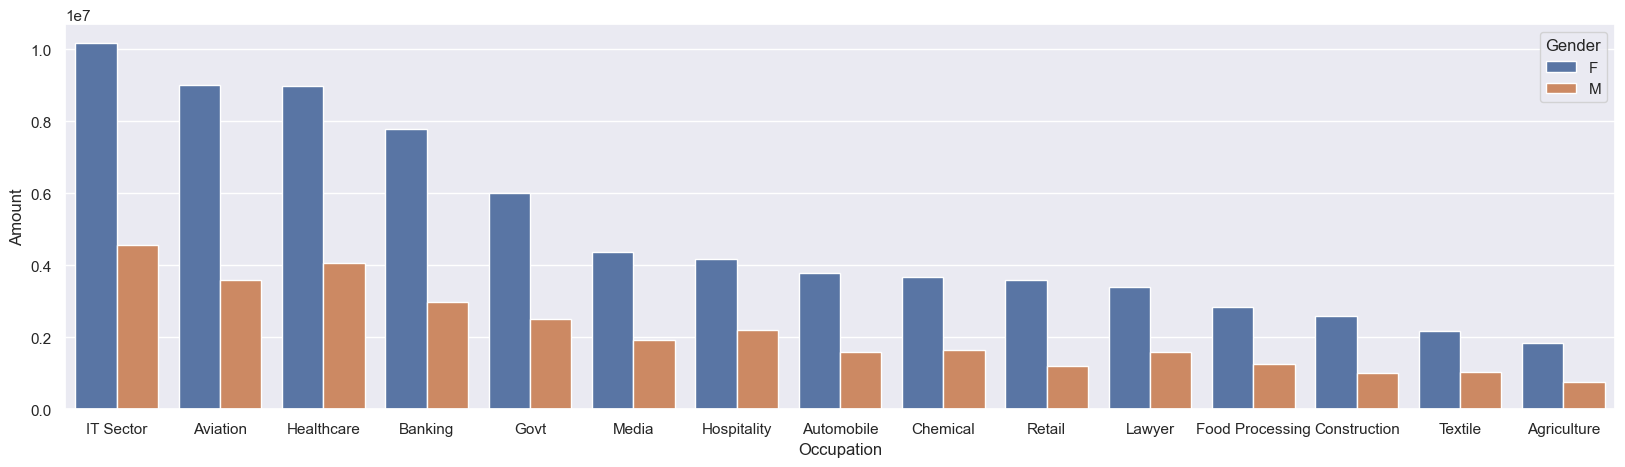

In [66]:
Sales_state = df.groupby(['Occupation','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation', y='Amount', hue='Gender', data=Sales_state)

From above graph we can see that most of the buyers are from It sectors, Aviation and Healthcare respectively and that too women.

# Product Category

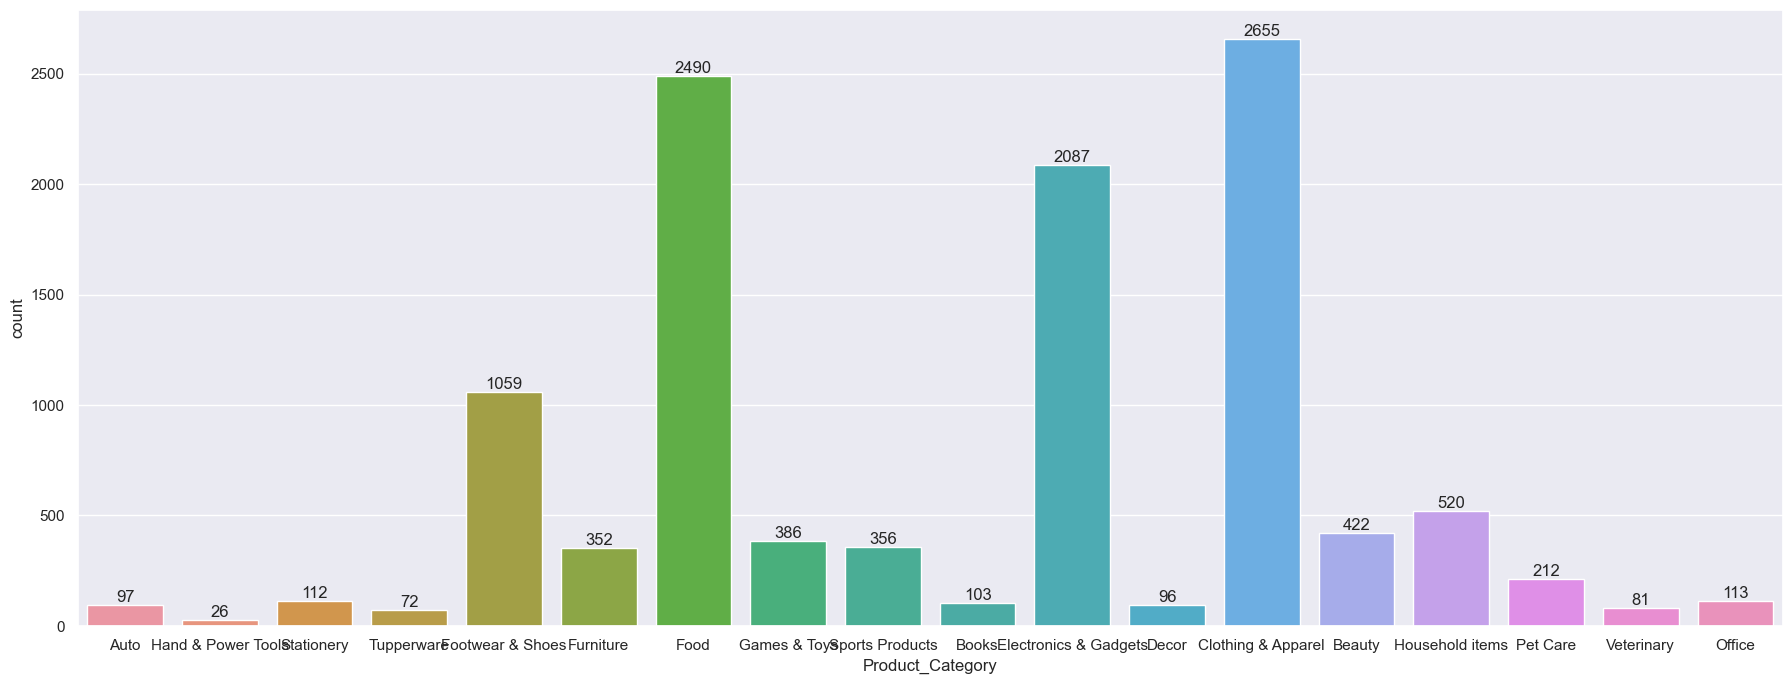

In [68]:
sns.set(rc= {'figure.figsize':(22,8)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

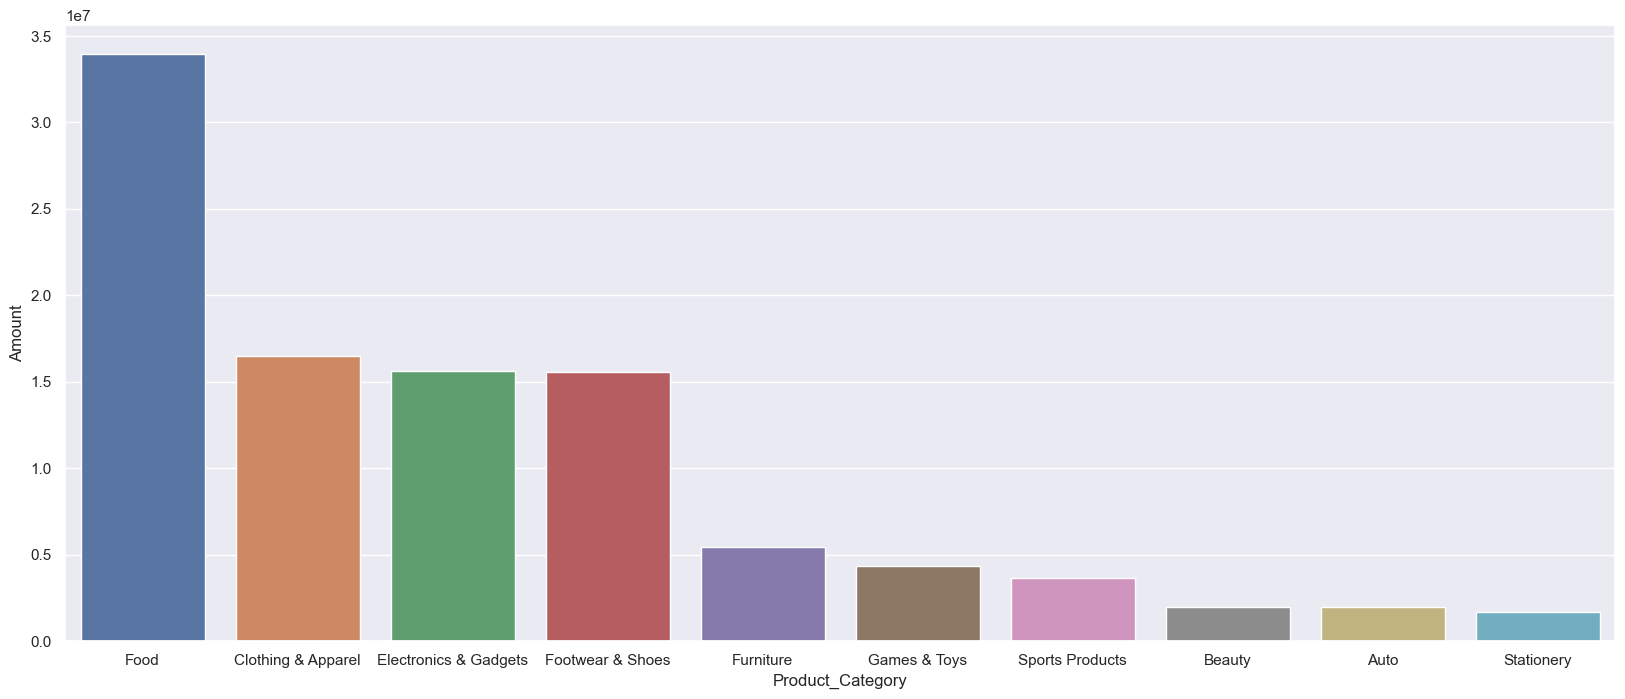

In [74]:
Sales_pro = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='Product_Category', y='Amount', data=Sales_pro)

<AxesSubplot:xlabel='Product_ID'>

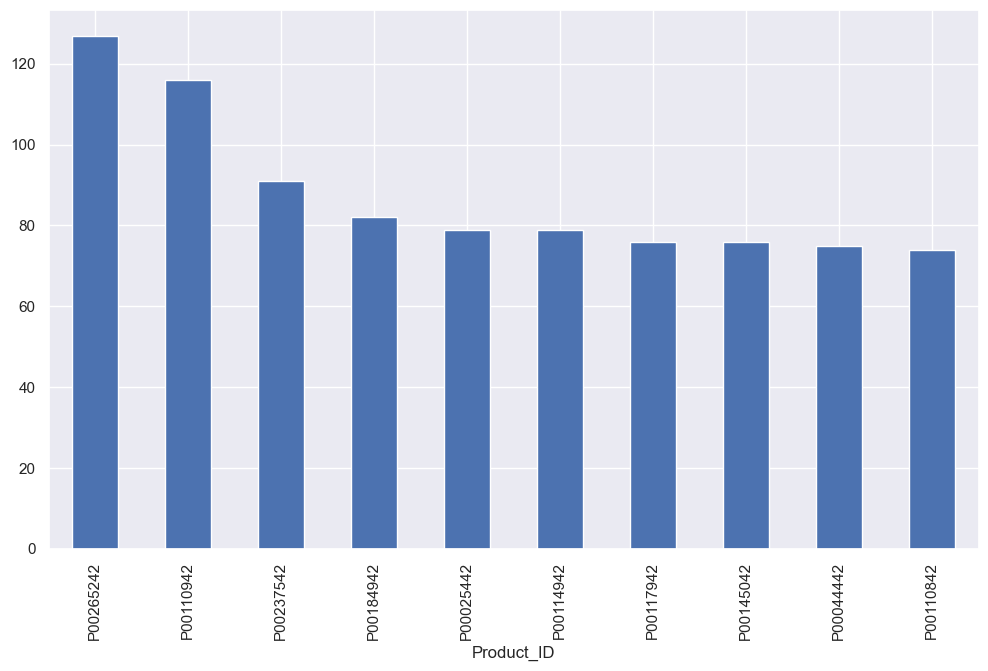

In [75]:
# Top 10 most sold products same as above 

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending= False).plot(kind='bar')

From the above graphs we can see that most sold products are from Food, Clothing and Electronics category.

# Conclusion:

### Married Women from age 26-35 years old from UP, Maharashtra and karnataka working in IT sector, aviation and Healthcare are more likely to buy products from Food , Clothing and Electronics category.